<a href="https://colab.research.google.com/github/boing-86/ML_study/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

(x_train, train_target), (x_val, val_target) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_val = x_val.reshape((10000, 28, 28, 1))

x_train = x_train/255.0
x_val = x_val/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state = 42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, test_target.shape)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

4431872/4422102 [==============================] - 0s 0us/step
(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (10000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
   

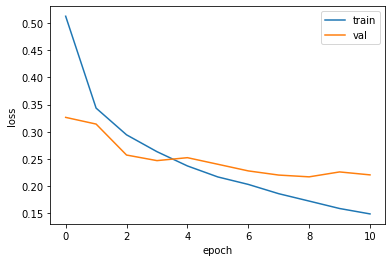

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

375/375 [==============================] - 5s 13ms/step - loss: 0.2169 - accuracy: 0.9208


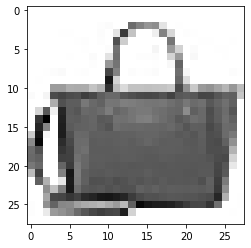

가방


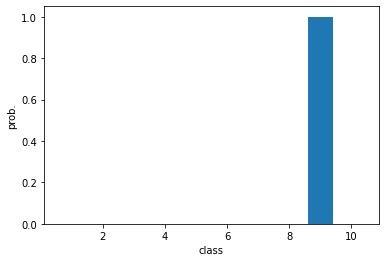

In [4]:
import numpy as np
model.evaluate(val_scaled, val_target)
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds=model.predict(val_scaled[0:1])
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠',
           '스니커즈', '가방', '앵클 부츠']

print(classes[np.argmax(preds)])

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [5]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2426 - accuracy: 0.9142


[0.2425653338432312, 0.9142000079154968]

(3, 3, 1, 32) (32,)
-0.021859758 0.24899998


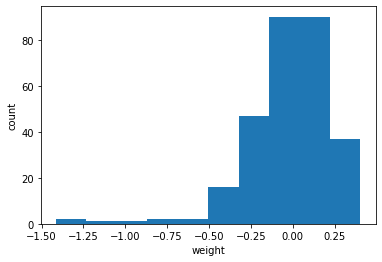

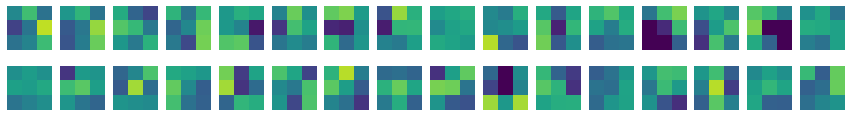

In [31]:
from sklearn import model_selection
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.models.load_model('best-cnn-model.h5')
model.layers

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

# 새 섹션

(3, 3, 1, 32)
0.0018115462 0.083485484


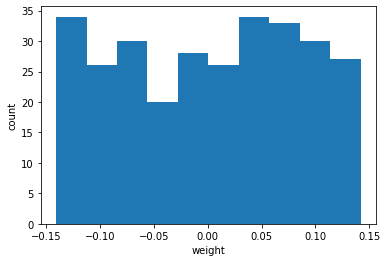

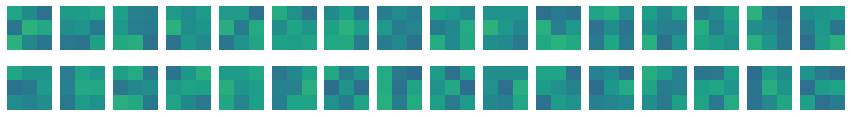

In [32]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [33]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(19, activation='softmax')

inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'")


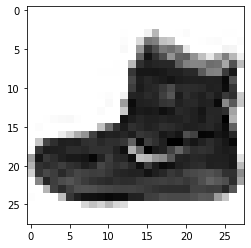

In [34]:
conv_acti = keras.Model(model.input, model.layers[0].output)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()


(3, 3, 1, 32) (32,)
-0.021859758 0.24899998


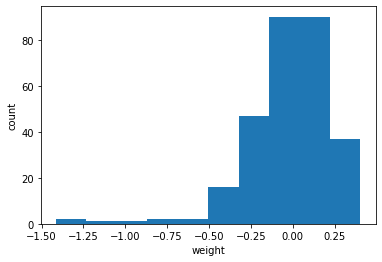

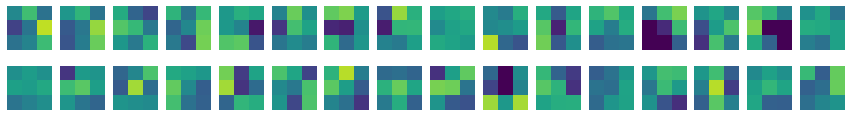

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [42]:
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.models.load_model('best-cnn-model.h5')
model.layers

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

(1, 28, 28, 32)


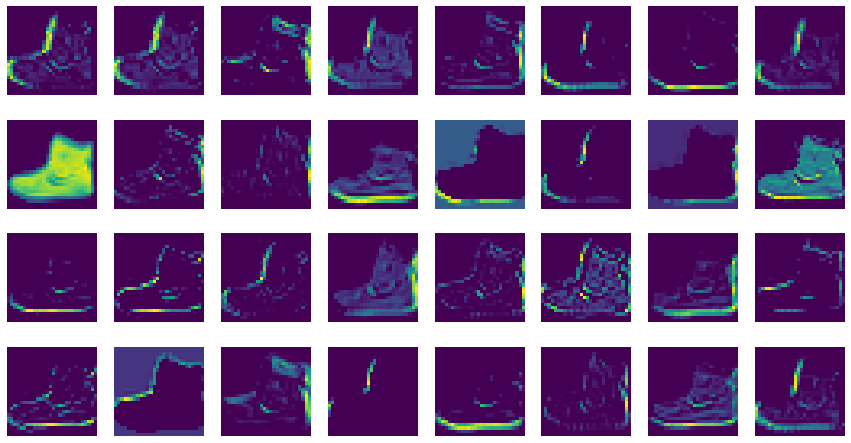

In [44]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')

plt.show()

(1, 14, 14, 64)


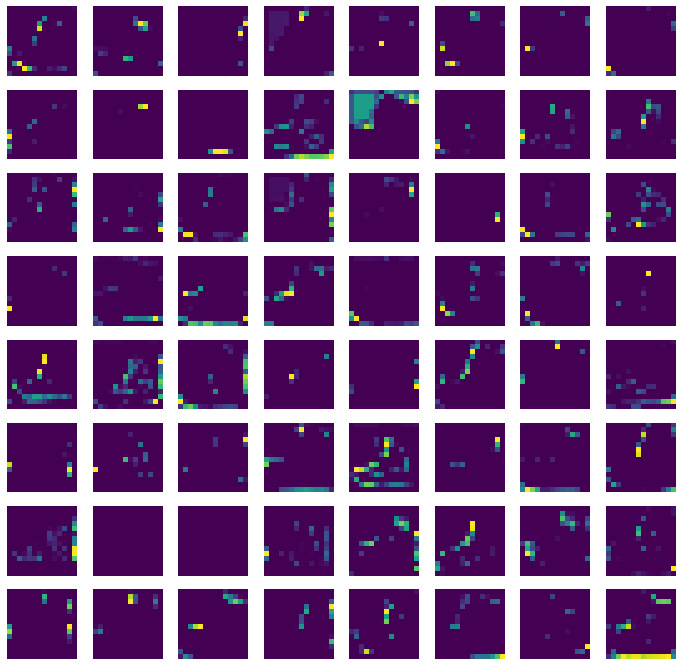

In [48]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)

print(feature_maps.shape)


fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')

plt.show()